Machine Learning Homework #3 Exercise 2 - ALVARO SALDANHA 2022719008 

a)

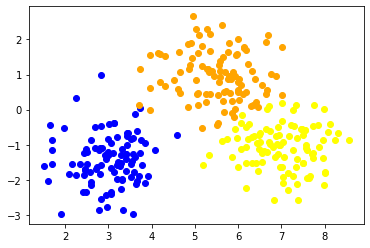

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Generating the data.
X1 = np.random.normal([7.0,-1.0],0.7,size=(100,2))
X2 = np.random.normal([3.0,-1.5],0.7,size=(100,2))
X3 = np.random.normal([5.5,1.0],0.7,size=(100,2))

# Plotting the data.
plt.scatter(X1[:,0],X1[:,1], color='yellow')
plt.scatter(X2[:,0],X2[:,1], color='blue')
plt.scatter(X3[:,0],X3[:,1], color='orange')
plt.show()

b)

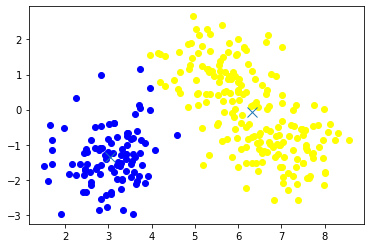

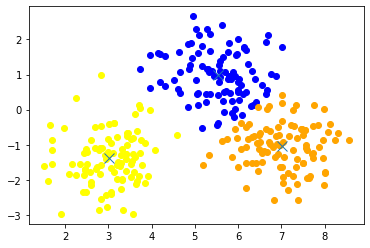

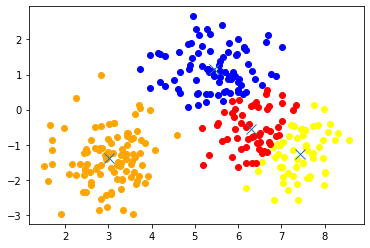

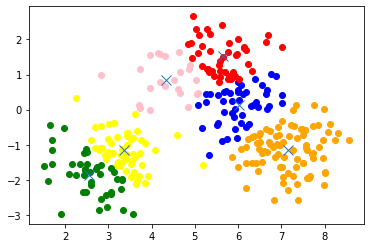

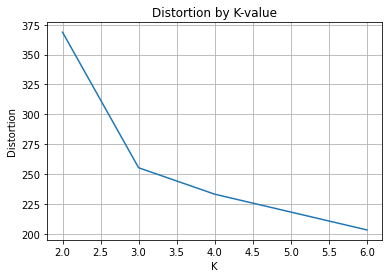

In [2]:
# Function to calculate eucliden distance between one and several points.
def eucdistance(point, data):
    return np.sqrt(np.sum((point - data)**2,axis=1))

# Function to calculate distorsion given certain clusters and respective centroids.
def distortion(clusters,centroids):
  distortion = 0
  for centroid,cluster in zip(centroids,clusters):
    for x in cluster:
      distortion += np.sqrt(np.sum((x - centroid)**2))
  return distortion

# Initializing variables.
K = [2,3,4,6]
epochs = 300
X = np.concatenate((X1,X2), axis = 0)
X = np.concatenate((X,X3), axis = 0 )
colors = ['yellow','blue','orange','red','green','pink']
distortions = []

# K-Means Implementation for each k.
for k in K:

  # Random centroid initialization.
  idx = np.random.choice(X.shape[0], k, replace=False)
  centroids = X[idx, :]
  prevcentroids = None 
  e = 0

  # Calculating centroids and clusters until no change happens or epochs reaches 300.
  while np.not_equal(centroids, prevcentroids).any() and e < epochs:
    clusters = [[] for i in range(k)]
    for x in X:
      distances = eucdistance(x, centroids)
      cidx = np.argmin(distances)
      clusters[cidx].append(x.tolist())
    prevcentroids = centroids
    centroids = [np.mean(cluster, axis=0) for cluster in clusters]
    for i, centroid in enumerate(centroids):
      if np.isnan(centroid).any(): 
          centroids[i] = prevcentroids[i]
    e += 1

  # Plotting the data.
  for i in range(k):
    x,y = zip(*clusters[i])
    plt.scatter(x,y,color=colors[i])
  plt.plot([x for x, _ in centroids],[y for _, y in centroids],'x',markersize=10)
  plt.show()

  distortions.append(distortion(clusters,centroids))

# Plotting distortion evolution for each k.
fig, ax = plt.subplots()
ax.plot(K, distortions)
ax.set(xlabel='K', ylabel='Distortion', title='Distortion by K-value')
ax.grid()
plt.show()
    
    





c)

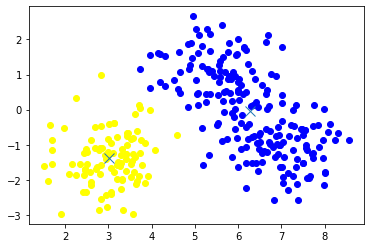

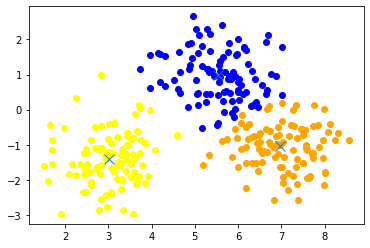

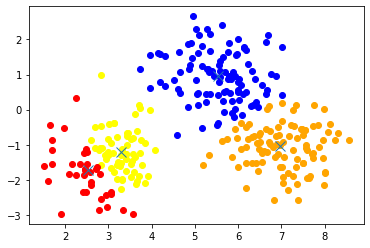

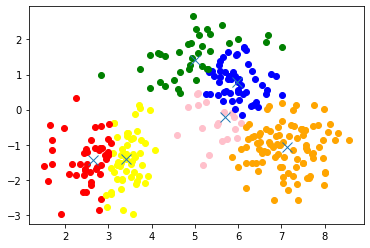

In [3]:
from sklearn.mixture import GaussianMixture

# Initiailizing variables.
K = [2,3,4,6]
X = np.concatenate((X1,X2), axis = 0)
X = np.concatenate((X,X3), axis = 0 )
colors = ['yellow','blue','orange','red','green','pink']

# Training the model and plotting the data.
for k in K:
  gm = GaussianMixture(n_components=k, random_state=0).fit(X)
  labels = gm.predict(X)
  labelsdist = [[] for i in range(k)]
  for label,x in zip(labels,X):
    plt.scatter(x[0],x[1],color=colors[label])
  plt.plot([x for x, _ in gm.means_],[y for _, y in gm.means_],'x',markersize=10)
  plt.show()
  